In [1]:
import pandas as pd
import matplotlib
import sys
import numpy.random as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('heart_cleveland_upload.csv')


In [2]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
Y = df['condition']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=31)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5)
cls = rf.fit(X_train, Y_train)
cls

RandomForestClassifier(max_depth=5, n_estimators=10)

In [10]:
from sklearn.metrics import f1_score

y_pred = cls.predict(X_test)
f1 = f1_score(Y_test, y_pred, average='micro')
print(f1)

0.8933333333333333


In [11]:
cls.feature_importances_ 

array([0.11337744, 0.03173416, 0.11831935, 0.0796968 , 0.06696014,
       0.00812301, 0.01372799, 0.15326209, 0.07896865, 0.13280927,
       0.02772599, 0.08208755, 0.09320754])

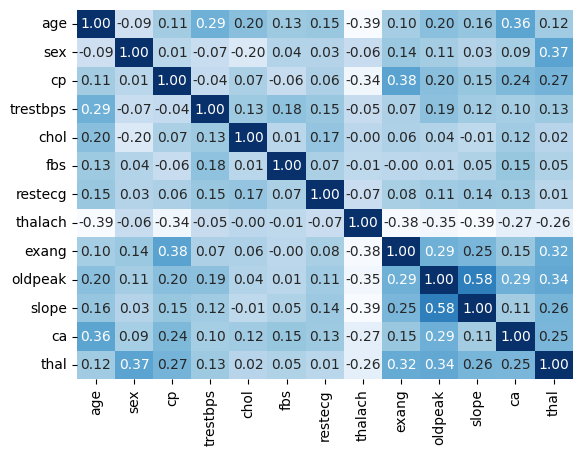

In [14]:
import seaborn as sns 

sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='Blues',cbar=None)
plt.show()

<Axes: >

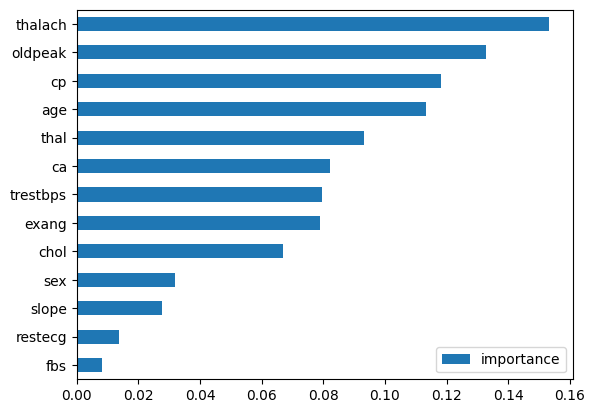

In [17]:
importancesDf = pd.DataFrame(cls.feature_importances_, index=X.columns, columns=['importance'])
importancesDf.sort_values(by='importance').plot(kind='barh')